# Exploración de una pagina WEB

Requests -  es una petición HTTP que se realiza a través de la biblioteca requests. Esta biblioteca permite enviar peticiones a sitios web y API, y gestionar las respuestas que se reciben.
Sirve para hacer una PETICIÓN

BeautifulSoup -- una biblioteca que permite extraer datos de páginas web y otros documentos

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup # BeautifulSoup -- una biblioteca que permite extraer datos (datos no estructurados) de páginas web y otros documentos

In [ ]:
url = "https://www.cancer.gov/espanol/cancer/tratamiento/mca"

Convertir en objeto .text

In [ ]:
contenido = requests.get(url).text

In [ ]:
print(contenido)

<!DOCTYPE html>
<html lang="es" dir="ltr" prefix="og: https://ogp.me/ns#">
  <head>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta charset="utf-8" />
<script>window.CDEConfig = {
  "exitDisclaimerHref":{
    "en":"\/policies\/linking",
    "es":"\/espanol\/politicas\/enlaces"
  },
  "showFloatingDelighters":true,
  "environmentConfig":{
    
  },
  "glossaryConfig":{
    "apiServer":"https:\/\/webapis.cancer.gov\/glossary\/v1\/"
  },
  "drugDictionaryConfig":{
    "apiServer":"https:\/\/webapis.cancer.gov\/drugdictionary\/v1\/"
  },
  "ctsConfig":{
    "apiServer":"https:\/\/clinicaltrialsapi.cancer.gov\/api\/v2",
    "printApiBase":"https:\/\/www.cancer.gov\/CTS.Print",
    "zipConversionEndpoint":"\/cts_api\/zip_code_lookup"
  },
  "r4rConfig":{
    "apiServer":"https:\/\/webapis.cancer.gov\/r4r\/v1"
  },
  "general":{
    "apiServer":"https:\/\/webapis.cancer.gov",
    "mediaServer":"https:\/\/nci-media.cancer.gov"
  },
  "sitewideSearchConfig":{
    "bestBetsAp

In [ ]:
print(type(contenido))

<class 'str'>


In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
h1 = soup.find_all("h1")

In [ ]:
print(h1)

[<h1>
            Medicina complementaria y alternativa
        </h1>]


In [ ]:
print(element.text)


            Medicina complementaria y alternativa
        


# Conteo de palabras

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p"))

In [ ]:
print(parrafos.count("Cáncer")) # Mayuscula

3


In [ ]:
print(parrafos.count("cáncer")) # Minuscula

5


In [ ]:
# Buscamos palabras
def buscador_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscador_palabra("Medicina")

Encontraste la palabra 'Medicina' 44 veces


In [ ]:
buscador_palabra("científicas")

Encontraste la palabra 'científicas' 1 veces


In [ ]:
buscador_palabra("medicina")

Encontraste la palabra 'medicina' 44 veces


# Texto Aleatorio

In [ ]:
import random

In [ ]:
parrafos = soup.find_all("p")
parrafos_aleatorio = random.choice(parrafos)
#Elimina los espacios = strip()
print(parrafos_aleatorio.text.strip())

Las personas usan términos como “natural”, “holístico”, “remedio casero” o “medicina oriental” para describir las terapias de MCA. Pero los expertos en general las agrupan en cinco categorías. Aquí se describen con ejemplos.


In [ ]:
parrafos = soup.find_all("p")
#Elimina los espacios = strip()
parrafos_aleatorio = random.choice(parrafos).text.strip()
print(parrafos_aleatorio)

La medicina complementaria y alternativa (MCA) se refiere a los productos y prácticas médicas que no son parte de la atención médica estándar. Las personas con cáncer tal vez usen la MCA para lo siguiente:


In [ ]:
print(len(parrafos_aleatorio.split()))

35


# Funciones para limpiar el texto

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Carga corpus de stopwords en español
nltk.download("stopwords")
stopwords_es = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Funcion para limpiar texto
def limpiar_texto(texto):

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [ ]:
colores_personalizados = ['#EE82EE', '#9932CC', '#DA70D6']  # Violetas
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: random.choice(colores_personalizados)).generate(texto_limpio)

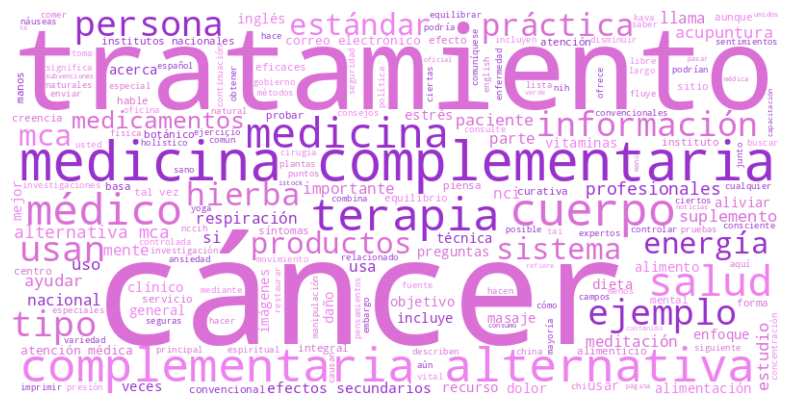

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=30,      # Mostrar máximo palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

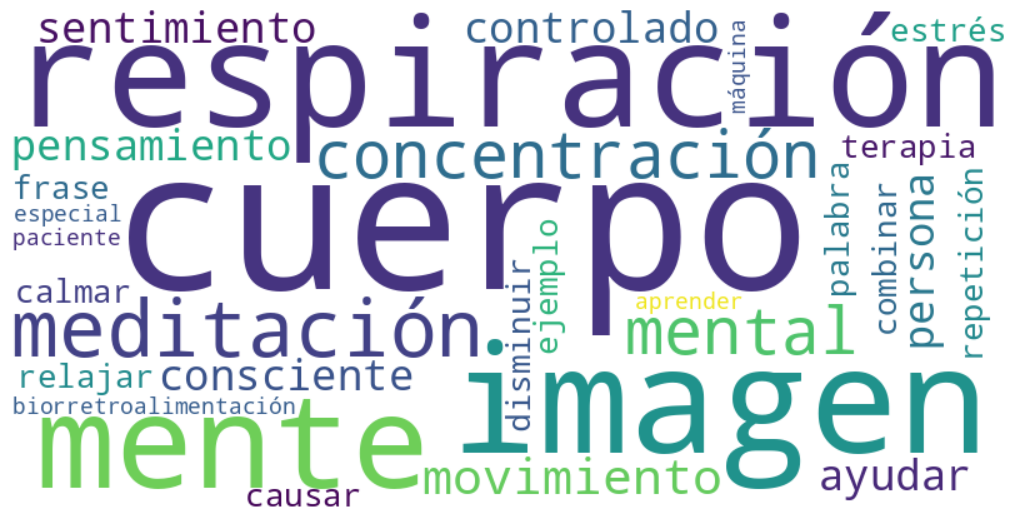

In [ ]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!

# Spacy

In [ ]:
# Documentacion de Spacy -- https://spacy.io/api/doc

!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importamos libreria Spacy ( Libreria que contiene funciones avanzadas para el procesamiento del lenguaje natural (PLN) en grandes volúmenes de texto a alta velocidad .)
# De la libreria Spacy utilizamos DISPLACY (facilitador)

import spacy
from spacy import displacy

In [ ]:
# PIPELINE DE SPACY (proceso automatizado usando una serie de operaciones a un texto para analizarlo. En este caso usamos el texto de la pagina https://www.cancer.gov/espanol/cancer/tratamiento/mca)

# Cargar el modelo
nlp = spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

In [ ]:
texto_ejemplo = 'Medicina convencional: sistema de atención de la salud que ponen en práctica los profesionales médicos con un título de licenciado en Medicina o en Medicina Osteopática. En inglés, los nombres suelen ir seguidos por "M.D." o "D.O.". Estos médicos tratan los síntomas y las enfermedades mediante el uso de medicamentos, radioterapia o cirugía.  También la usan otros profesionales de la salud, como los enfermeros, farmacéuticos, asociados médicos y terapeutas. A veces se llama medicina alopática, biomedicina, medicina occidental, medicina estándar o medicina ortodoxa. Algunos profesionales que practican la atención médica convencional también son profesionales de MCA.'

In [ ]:
# Procesar el texto con Spacy
doc = nlp(texto_web)

In [ ]:
# Tokenizacion (dividir el texto en palabras/símbolos)
tokens = [token.text for token in doc]
print(tokens)

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Medicina', 'complementaria', 'y', 'alternativa', '(', 'MCA', ')', '\n\n\n\n\n\n\n\n\n\n\n\n\n      ', 'Pasar', 'al', 'contenido', 'principal', '\n    \n\n\n\n\n\n        ', 'Un', 'sitio', 'oficial', 'del', 'Gobierno', 'de', 'Estados', 'Unidos', '\n      \n', 'English', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Menú', '\n\n\n\t\t\t\t\t\t', 'Buscar', '\n\t\t\t\t\t\n\n\n', 'Buscar', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'El', 'cáncer', '\n\n\n\n\n', 'Tipos', 'de', 'cáncer', '\n\n\n\n\n', 'Investigación', '\n\n\n\n\n', 'Subvenciones', 'y', 'capacitación', '\n\n\n\n\n', 'Noticias', '\n\n\n\n\n', 'Acerca', 'del', 'NCI', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Página', 'principal', '\n\n\n\n\n', 'El', 'cáncer', '\n\n\n\n\n', 'Tratamiento', 'del', 'cáncer', '\n\n\n\n', 'Medicina', 'complementaria', 'y', 'alternativa', '\n\n\n\n\n\n\n\n\n\n\n\n      ', 'Imprimir', '   \n\n\n\n\n\n\n\n      ', 'Enviar', 'por', 'correo', 'electrónico', '

In [ ]:
# Lematizacion: forma base de cada token
for token in doc:
    # Ignoramos puntuación y espacios para mayor claridad
    if not token.is_punct and not token.is_space:
        print(f"'{token.text}' -> '{token.lemma_}'")

'Medicina' -> 'Medicina'
'convencional' -> 'convencional'
'sistema' -> 'sistema'
'de' -> 'de'
'atención' -> 'atención'
'de' -> 'de'
'la' -> 'el'
'salud' -> 'salud'
'que' -> 'que'
'ponen' -> 'poner'
'en' -> 'en'
'práctica' -> 'práctica'
'los' -> 'el'
'profesionales' -> 'profesional'
'médicos' -> 'médico'
'con' -> 'con'
'un' -> 'uno'
'título' -> 'título'
'de' -> 'de'
'licenciado' -> 'licenciado'
'en' -> 'en'
'Medicina' -> 'Medicina'
'o' -> 'o'
'en' -> 'en'
'Medicina' -> 'Medicina'
'Osteopática' -> 'Osteopática'
'En' -> 'en'
'inglés' -> 'inglés'
'los' -> 'el'
'nombres' -> 'nombre'
'suelen' -> 'soler'
'ir' -> 'ir'
'seguidos' -> 'seguido'
'por' -> 'por'
'M.D.' -> 'M.D.'
'o' -> 'o'
'D.O.' -> 'D.O.'
'Estos' -> 'este'
'médicos' -> 'médico'
'tratan' -> 'tratar'
'los' -> 'el'
'síntomas' -> 'síntoma'
'y' -> 'y'
'las' -> 'el'
'enfermedades' -> 'enfermedad'
'mediante' -> 'mediante'
'el' -> 'el'
'uso' -> 'uso'
'de' -> 'de'
'medicamentos' -> 'medicamento'
'radioterapia' -> 'radioterapia'
'o' -> 'o'
'

In [ ]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'Medicina' -> PROPN (proper noun) -> PROPN
'convencional' -> ADJ (adjective) -> ADJ
':' -> PUNCT (punctuation) -> PUNCT
'sistema' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'atención' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'la' -> DET (determiner) -> DET
'salud' -> NOUN (noun) -> NOUN
'que' -> PRON (pronoun) -> PRON
'ponen' -> VERB (verb) -> VERB
'en' -> ADP (adposition) -> ADP
'práctica' -> NOUN (noun) -> NOUN
'los' -> DET (determiner) -> DET
'profesionales' -> NOUN (noun) -> NOUN
'médicos' -> ADJ (adjective) -> ADJ
'con' -> ADP (adposition) -> ADP
'un' -> DET (determiner) -> DET
'título' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'licenciado' -> NOUN (noun) -> NOUN
'en' -> ADP (adposition) -> ADP
'Medicina' -> PROPN (proper noun) -> PROPN
'o' -> CCONJ (coordinating conjunction) -> CCONJ
'en' -> ADP (adposition) -> ADP
'Medicina' -> PROPN (proper noun) -> PROPN
'Osteopática' -> PROPN (proper noun) -> PROPN
'.' -> PUNCT (punctuation) -> PUNCT
'En

In [ ]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Medicina' -> ROOT (root) -> 'Medicina'
'convencional' -> amod (adjectival modifier) -> 'Medicina'
':' -> punct (punctuation) -> 'sistema'
'sistema' -> appos (appositional modifier) -> 'Medicina'
'de' -> case (case marking) -> 'atención'
'atención' -> nmod (modifier of nominal) -> 'sistema'
'de' -> case (case marking) -> 'salud'
'la' -> det (determiner) -> 'salud'
'salud' -> nmod (modifier of nominal) -> 'sistema'
'que' -> obj (object) -> 'ponen'
'ponen' -> acl (clausal modifier of noun (adjectival clause)) -> 'sistema'
'en' -> case (case marking) -> 'práctica'
'práctica' -> compound (compound) -> 'ponen'
'los' -> det (determiner) -> 'profesionales'
'profesionales' -> nsubj (nominal subject) -> 'ponen'
'médicos' -> amod (adjectival modifier) -> 'profesionales'
'con' -> case (case marking) -> 'título'
'un' -> det (determiner) -> 'título'
'título' -> obl (oblique nominal) -> 'ponen'
'de' -> case (case marking) -> 'licenciado'
'licenciado' -> nmod (modifier of nominal) -> 'título'
'en' ->

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [ ]:
if doc.ents:
    print("Entidades encontradas:")
    print("Texto de la Entidad -> Etiqueta (Tipo)")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("No se encontraron entidades nombradas en este texto.")

Entidades encontradas:
Texto de la Entidad -> Etiqueta (Tipo)
'Medicina' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Medicina Osteopática' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'A veces se llama medicina alopática' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'MCA' -> ORG (Companies, agencies, institutions, etc.)


In [ ]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

# Ejemplo de otro texto de la misma pagina

In [ ]:
from collections import Counter

In [ ]:
wiki_txt = """
Estas terapias combinan la concentración mental, la respiración y el movimiento del cuerpo para relajar el cuerpo y la mente. Por ejemplo:

Meditación: respiración de concentración o repetición de palabras o frases para calmar la mente y disminuir los pensamientos y sentimientos que causan estrés.
Biorretroalimentación: uso de máquinas especiales para que el paciente aprenda a controlar ciertas funciones del cuerpo de las que no suele estar consciente, como la frecuencia cardíaca y la presión arterial.
Hipnosis: estado similar al trance en el que una persona se vuelve más consciente y se enfoca en ciertos sentimientos, pensamientos, imágenes, sensaciones o comportamientos. La persona quizás se sienta más tranquila y dispuesta a aceptar sugerencias que podrían ayudar en la curación.
Yoga: antiguo sistema de prácticas que se usa para equilibrar la mente y el cuerpo por medio de estiramientos y posturas, meditación y respiración controlada.
Tai chi: forma de ejercicio suave y meditación en la que se usan conjuntos de movimientos corporales lentos y respiración controlada.
Imágenes guiadas:  técnica en la que usan imágenes mentales positivas, como al concentrarse en escenas, imágenes o experiencias para ayudar al cuerpo a sanar. También se llama imaginería.
Expresiones creativas: actividades como el arte, la música o la danza.
"""

In [ ]:
print(f"'{wiki_txt[:200]}...'") # Muestra un fragmento

'
Estas terapias combinan la concentración mental, la respiración y el movimiento del cuerpo para relajar el cuerpo y la mente. Por ejemplo:

Meditación: respiración de concentración o repetición de pa...'


In [ ]:
doc = nlp(wiki_txt)
print("¡Texto procesado!")

¡Texto procesado!


In [ ]:
palabras_clave = []

In [ ]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 103 palabras clave (lemas, sin stop words).
Ejemplo: ['terapia', 'combinar', 'concentración', 'mental', 'respiración', 'movimiento', 'cuerpo', 'relajar', 'cuerpo', 'mente', 'ejemplo', 'meditación', 'respiración', 'concentración', 'repetición']


In [ ]:
frecuencia_palabras = Counter(palabras_clave)

In [ ]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [ ]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' -> {frecuencia}")

- 'cuerpo' -> 5
- 'respiración' -> 4
- 'imagen' -> 4
- 'mente' -> 3
- 'meditación' -> 3
- 'concentración' -> 2
- 'mental' -> 2
- 'movimiento' -> 2
- 'pensamiento' -> 2
- 'sentimiento' -> 2
- 'consciente' -> 2
- 'persona' -> 2
- 'ayudar' -> 2
- 'controlado' -> 2
- 'terapia' -> 1
